# Analysis for Continuous Improvement

Author Name: Kenzie Talhelm

9-digit PID: 730489406

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should add a chat room feature where simple questions about assignments or concepts can be answered without taking up an entire slot with tutoring or office hours because this would be more efficient than the system already in place for both students and TA's, benefiting both of these groups. 
2. The course should add optional challenge features to the exercises for students that have more previous knowledge about Python and coding because these students will gain more from the course than they otherwise would.
3. This course should add more information about how the concepts we are learning in class can be applied to jobs in various fields so that students in various majors see how this class is applicable to them, helping them get a better idea of how the course is relevant to their majors/fields. 
4. This course should add a mini coding assignment to the end of lessons that would review and apply the concepts of that lesson because it would better ingrain the concepts and how they are applied within python for all students in the class. The assignment would be worked through individually, but a key would be provided. 
5. This course should include more application questions in the post-lesson questions because most of the content true/false questions really only test if students can listen to what the video says, not whether they understand the material. Adjusting this would aid all students who want to better understand the material and would prevent listening without comprehension.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: The idea of adding a feature to ask questions does not have suffecient data to support this idea, as it is not asked about in the survey. 


2. Suggestion for how to collect data to support this idea in the future: In future surveys, ask whether a chat room feature, maybe supported through Course Care, to ask relatively minimal questions would be benefitial to students, responding with either yes/no or on a scale of 1 to 7. 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: Idea 3 - Adding a challenge option on the exercises for more advanced students and/or those looking for more practice.

2. This idea is more valuable than the others brainstormed because: it provides an opportunity for further improvement and learning for all members of the class, maximizing the value of the course.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [141]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [142]:
from data_utils import read_csv_rows, head, columnar, select, count, high_exp, masked, concat_2, organize_count
from tabulate import tabulate

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [143]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

In [144]:
data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

data_cols: dict[str, list[str]] = columnar(data_rows)

`Read_csv_rows` takes the raw data and creates a new list, `data_rows`, that contains the each row's data as its value. `Columnar` takes this list and transforms it to a dictionary where the key is the column name and the value is the data associated with that column from the previous rows, making each of the survey questions accessible.

In [145]:
selected_data: dict[str, list[str]] = select(data_cols, ["prior_exp", "programming_effective", "difficulty", "valuable"])

selected_data_head: dict[str, list[str]] = head(selected_data, 300)

This code cell uses the `select` function to draw out the appropriate columns and their data: `prior_exp`, `difficulty`, `valuable`, and `programming_effective`. The `head` function is then used to narrow the `selected_data` to the first 300 entries.

In [146]:

one_two_years_prior_exp_mask: list[bool] = high_exp(selected_data_head["prior_exp"], "1-2 years")

over_two_years_prior_exp_mask: list[bool] = high_exp(selected_data_head["prior_exp"], "Over 2 years")

The `high_exp` function creates a mask that returns a list of bools where true values correspond to high prior experience (1-2 years or Over 2 years) and false values correspond to any other answer. 

In [147]:

a_prog_eff: list[str] = masked(selected_data_head["programming_effective"], one_two_years_prior_exp_mask)

b_prog_eff: list[str] = masked(selected_data_head["programming_effective"], over_two_years_prior_exp_mask)

The `masked` function returns the list of `programming_ effective` rating values for survery entries that also had prior experience of 1-2 years or Over 2 years.

In [148]:
a_diff: list[str] = masked(selected_data_head["difficulty"], one_two_years_prior_exp_mask)

b_diff: list[str] = masked(selected_data_head["difficulty"], over_two_years_prior_exp_mask)

The `masked` function here returns the list of `difficult` rating values for survey entries that also had prior experience of 1-2 years or Over 2 years.

In [149]:
a_val: list[str] = masked(selected_data_head["valuable"], one_two_years_prior_exp_mask)

b_val: list[str] = masked(selected_data_head["valuable"], over_two_years_prior_exp_mask)

The `masked` function here returns the list of `valuable` rating values for survey entries that also had prior experience of 1-2 years or OVer 2 years.

In [150]:
count_a_prog_eff: dict[str, int] = count(a_prog_eff)

count_b_prog_eff: dict[str, int] = count(b_prog_eff)


The `count` function counts the programming_effective ratings (1-7), determining how many high prior experience students rated programming_effective 7, 6, and so on. 

In [151]:
count_a_diff: dict[str, int] =  count(a_diff)

count_b_diff: dict[str, int] = count(b_diff)

The `count` function here counts the difficulty ratings (1-7), determining how many high prior experience students rated course difficulty a 7, a 6, and so on.

In [152]:
count_a_val: dict[str, int] = count(a_val)

count_b_val: dict[str, int] = count(b_val)

The `count` function here counts the valuable ratings (1-7), determining how many high prior experience students rated course valuability a 7, a 6, and so on. 

In [153]:
count_prog_eff: dict[str, int] = concat_2(count_a_prog_eff, count_b_prog_eff)

count_diff: dict[str, int] = concat_2(count_a_diff, count_b_diff)

count_val: dict[str, int] = concat_2(count_a_val, count_b_val)

The `concat_2` function is used here to combine the counts from "1-2 years" and "Over 2 years" into one dictionary. Each dictionary records the count values for the ratings of programming_effective, difficulty, and valuable, respectively, for both prior_exp markers. 

In [154]:
org_count_prog_eff: dict[str, int] = organize_count(count_prog_eff)

org_count_diff: dict[str, int] = organize_count(count_diff)

org_count_val: dict[str, int] = organize_count(count_val)

print(org_count_prog_eff)
print(org_count_diff)
print(org_count_val)

{'1': 0, '2': 1, '3': 0, '4': 1, '5': 0, '6': 5, '7': 15}
{'1': 4, '2': 4, '3': 2, '4': 9, '5': 3, '6': 0, '7': 0}
{'1': 0, '2': 0, '3': 0, '4': 0, '5': 2, '6': 5, '7': 15}


The `organize_count` function organizes the count values by numerical order for each category.

<BarContainer object of 7 artists>

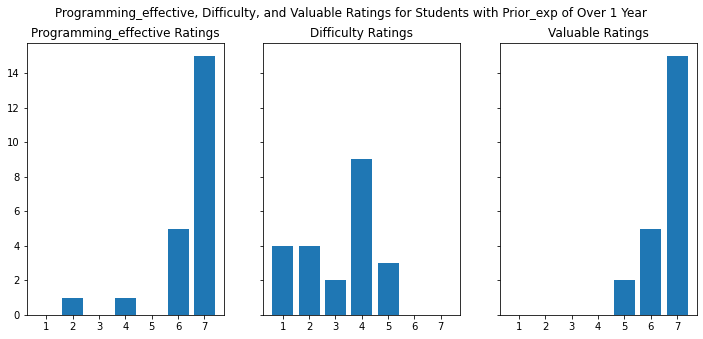

In [155]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
fig.suptitle("Programming_effective, Difficulty, and Valuable Ratings for Students with Prior_exp of Over 1 Year")


axes[0].set_title("Programming_effective Ratings")
axes[0].bar(org_count_prog_eff.keys(), org_count_prog_eff.values())

axes[1].set_title("Difficulty Ratings")
axes[1].bar(org_count_diff.keys(), org_count_diff.values())

axes[2].set_title("Valuable Ratings")
axes[2].bar(org_count_val.keys(), org_count_val.values())

The code above creates the bar chart that visualizes the ratings for each of the categories (programming_effective, difficulty, and valuable) from Comp 110 students that have prior_exp of over 1 year. 

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

Based on the analyzed data above, I would say the results are inconclusive, but lean towards supporting the idea of implementing a challenge option for the programming exercises. Overall, students with >1 year of experience find the programming exercises useful in learning course concepts, with 20 of 22 sampled students ranking it either a 6 or 7 (with a 7 being the very helpful, and a 1 being not helpful at all.) These students also find the course overall helpful, with 20 of 22 students also ranking the course's valuability as a 6 or 7; the other 2 ranked course value as a 5. However, when asked to rank the difficulty of the course (1-7, with 1 being not difficult at all, and 7 being extremely hard), 8 students ranked the course either a 1 or 2), 2 students ranked the class as a 3, 3 students ranked the course as a 5, and the 9 student majority ranked the course at 4. Students find the programming exercises helpful and the course valuable, but find the course to be low to mid range difficulty. Therefore, while experienced students are finding the course to be relatively easy, it does not detract from the value of the course as a whole nor do students find issue with the current programming exercises. While adding an optional challenge feature to programming exercises might make the course overall a bit more challenging, it would only be worth it if the time and effort to incorporate it into the programming exercise design is minimal. Since the feature would need to be optional for all students so that beginning students are not negatively effeted, it is not known whether the feature would even be used by more experienced students. To get more conclusive data, I would recommend implementing the challenge feature into one programming exercise and then adnminister a survey, maybe within the next lesson, on whether the student a, attempted the challenge feature, and b, whether they found it helpful. If the results from this are positive and the cost of implementing it within the programming exercises is minimal for the exercises designers (professors and TAs), then it would be benefitial to implement. Otherwise, it would be too costly for the exercise designers to spend time and effort to create this feature. 